# Classy plotting
Figuring out if classes are a better way of plotting heatmaps - verdict still out

#### This notebook takes a premade heatmap array and plots it using a new Class-based method that is designed for _minimal fuss_

1. Load heatmap(s)
2. Plot using class method
3. Plot using old method

In [1]:
import os
import numpy as np
import render
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10,6]

##### Loading heatmaps 

In [2]:
canon_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/scr_apop_wt_div_N_cell_N_event_P_event_800.800.10.npz')
control_arrays = np.load('/home/nathan/data/results/radial_analysis_output/follow/arrays/wt_control_wt_div_N_cell_N_event_P_event_800.800.10.npz')

Array key: 

    arr_0 = N_cells
    arr_1 = N_events
    arr_2 = P_events
    
Array dimensionality:

    y = radial dimension
    x = temporal dimension

In [3]:
for i in canon_arrays:
    print(i)

arr_0
arr_1
arr_2


In [4]:
canon_arrays['arr_2']

array([[0.00207791, 0.00224084, 0.00141168, 0.00132865, 0.00141313,
        0.00091527, 0.00105961, 0.00105217, 0.00113566, 0.00111346],
       [0.00197637, 0.00177525, 0.00163802, 0.0015011 , 0.00134412,
        0.0012967 , 0.00134064, 0.00128581, 0.00126718, 0.00118534],
       [0.00175041, 0.0017683 , 0.0017051 , 0.00156908, 0.00148989,
        0.00137225, 0.00140396, 0.00138051, 0.00134145, 0.00129904],
       [0.00191597, 0.00168858, 0.00178383, 0.00166355, 0.00152496,
        0.00138755, 0.00140474, 0.00143284, 0.00131253, 0.00133735],
       [0.00171874, 0.00172032, 0.001738  , 0.00161022, 0.00153505,
        0.00142475, 0.00142009, 0.00142066, 0.0013129 , 0.00129414],
       [0.00184081, 0.00184503, 0.00173159, 0.00167957, 0.00156042,
        0.00148146, 0.00145129, 0.00143947, 0.00136   , 0.00127561],
       [0.00186075, 0.00181038, 0.00169634, 0.00164578, 0.00154604,
        0.00146484, 0.00145331, 0.00143062, 0.0013681 , 0.00131944],
       [0.00185229, 0.00192518, 0.0017565

In [5]:
P_events = canon_arrays['arr_2']
P_events_c = control_arrays['arr_2']

# Now with classes

Call the Heatmap class and provide the input histogram along with a few initially necessary params (ie the radius and the time range and an optional input_details dict.

In [16]:
canon_heatmap = render.Heatmap(P_events, radius = 800, t_range = 800)

Input the title of your plotCanonical Probability heatmap of wild-type divisions around N = 1839 Scribble apoptoses
Input the label for your colorbarProbability of wild-type division
What is the focal event of the radial scan?Scribble apoptoses


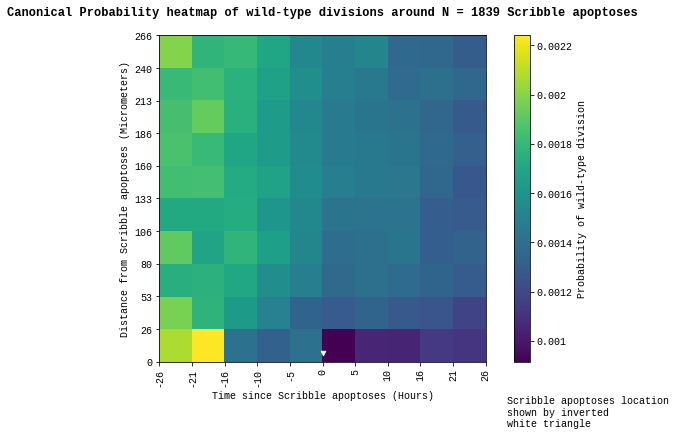

In [18]:
canon_heatmap.render_plot()

### You can also use an input dictionary called `scan_details` (similar to old plotter) in order to plot automatically and specify other plotting parameters if they are other than the default (such as including the apoptotic bin or changing the colorbar limits). 

In [28]:
canon_heatmap.scan_details = {'focal_cell':'Scribble', 'focal_event':'Apoptoses', 'input_type': 'P_events', 'N':1839, 'subject_cell': 'wild-type', 'subject_event': 'division'}

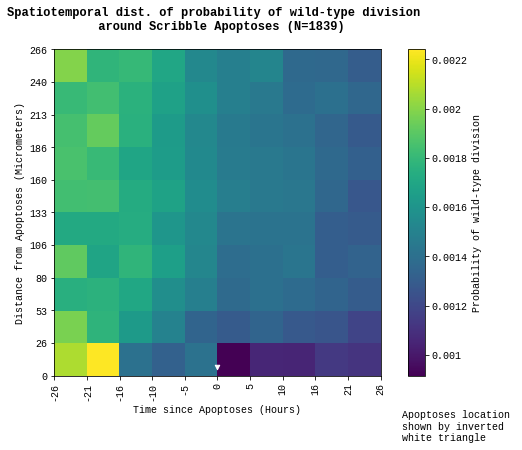

In [30]:
canon_heatmap.render_plot()

### You can specify certain parameters within the render_plot() function, such as whether to include the first spatial (apoptosis) bin, manually set the colorbar limits, or set a directory location to save out a copy of the plot.

Plot saved at  home/nathan/data/results/test/scribble_apoptoses_wild-type_division/Spatiotemporal dist. of probability of wild-type division 
 around Scribble Apoptoses (N=1839) 800.800.10.pdf


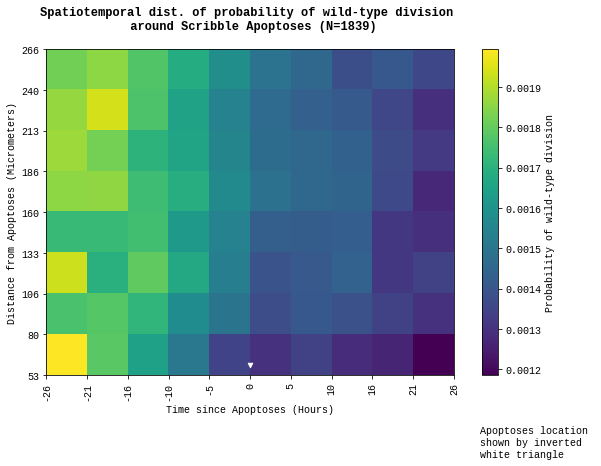

In [32]:
canon_heatmap.render_plot(include_apop_bin=False, output_path= 'home/nathan/data/results/test') #, cbar_lim=[1,0])

### By using the class method of plotting functions you can have multiple different heatmaps being plot simultaneously all with different parameters that don't get overwritten.

In [34]:
control_heatmap = render.Heatmap(P_events_c, radius = 800, t_range = 800)

In [37]:
control_heatmap.scan_details = {'focal_cell':'Wild-type', 'focal_event':'control time-points', 'input_type': 'N_cells', 'N':1839, 'subject_cell': 'Wild-type', 'subject_event': 'divisions'}

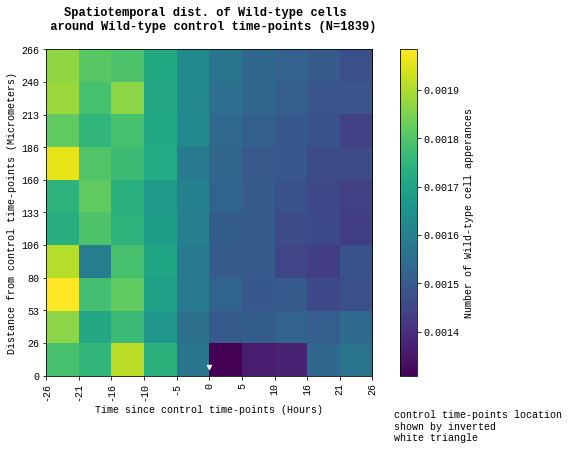

In [38]:
control_heatmap.render_plot()

### The legacy method of plotting heatmaps 

Everything would have to go in the `input_dict`

In [6]:
## set a few params in inout dict
#input_dict = {'input_2d_hist':P_events, 'input_type':'P_events', 'N': 1839, 'radius': 800, 't_range': 800, 'focal_cell':'Scr', 'focal_event':'apop', 'subject_cell':'wt', 'subject_event': 'div', 'include_apop_bin':True, 'SI':True}

In [6]:
input_dict = {'input_2d_hist':P_events}

Enter the scan radius800
Enter the scan time range800
Input the title of your plotProbability plot
Input the label for your colorbarProbability of wild-type division
What is the focal event of the radial scan?Apoptoses


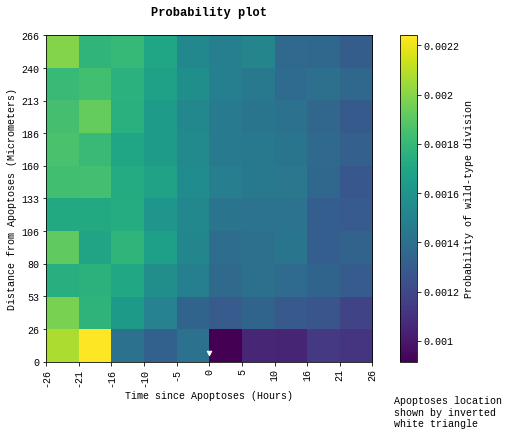

In [7]:
render.auto_plot_cumulative(input_dict)